**This is Breast Cancer classification code for Fusemachine AI Fellowship 2023 Machine learning Course Project**

**Swodesh Sharma**

**Nadika Poudel**

**Krishbin Poudel**

**Krishant Timilsina**

Dataset features explanation
Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant


In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import f1_score
 
import pickle

In [2]:
df = pd.read_csv('breast_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [171]:
df = df.dropna(axis='columns')
df = df.drop(columns=['id'])
features = df.columns

In [172]:
features

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [174]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [175]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [176]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [177]:
df.shape

(569, 31)

In [178]:
def classifier(data):
    if data["diagnosis"]=="M":
        return "1"
    else:
        return "0"
df["diagnosis"] = df.apply(classifier, axis=1)
df["diagnosis"]=pd.to_numeric(df["diagnosis"],errors="coerce")

In [179]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


([<matplotlib.axis.XTick at 0x23201904850>,
 [Text(0, 0, 'M'), Text(1, 0, 'B')])

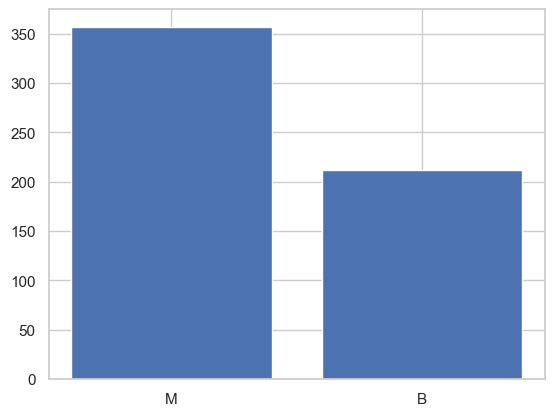

In [180]:
counts = df["diagnosis"].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ['M', 'B'])

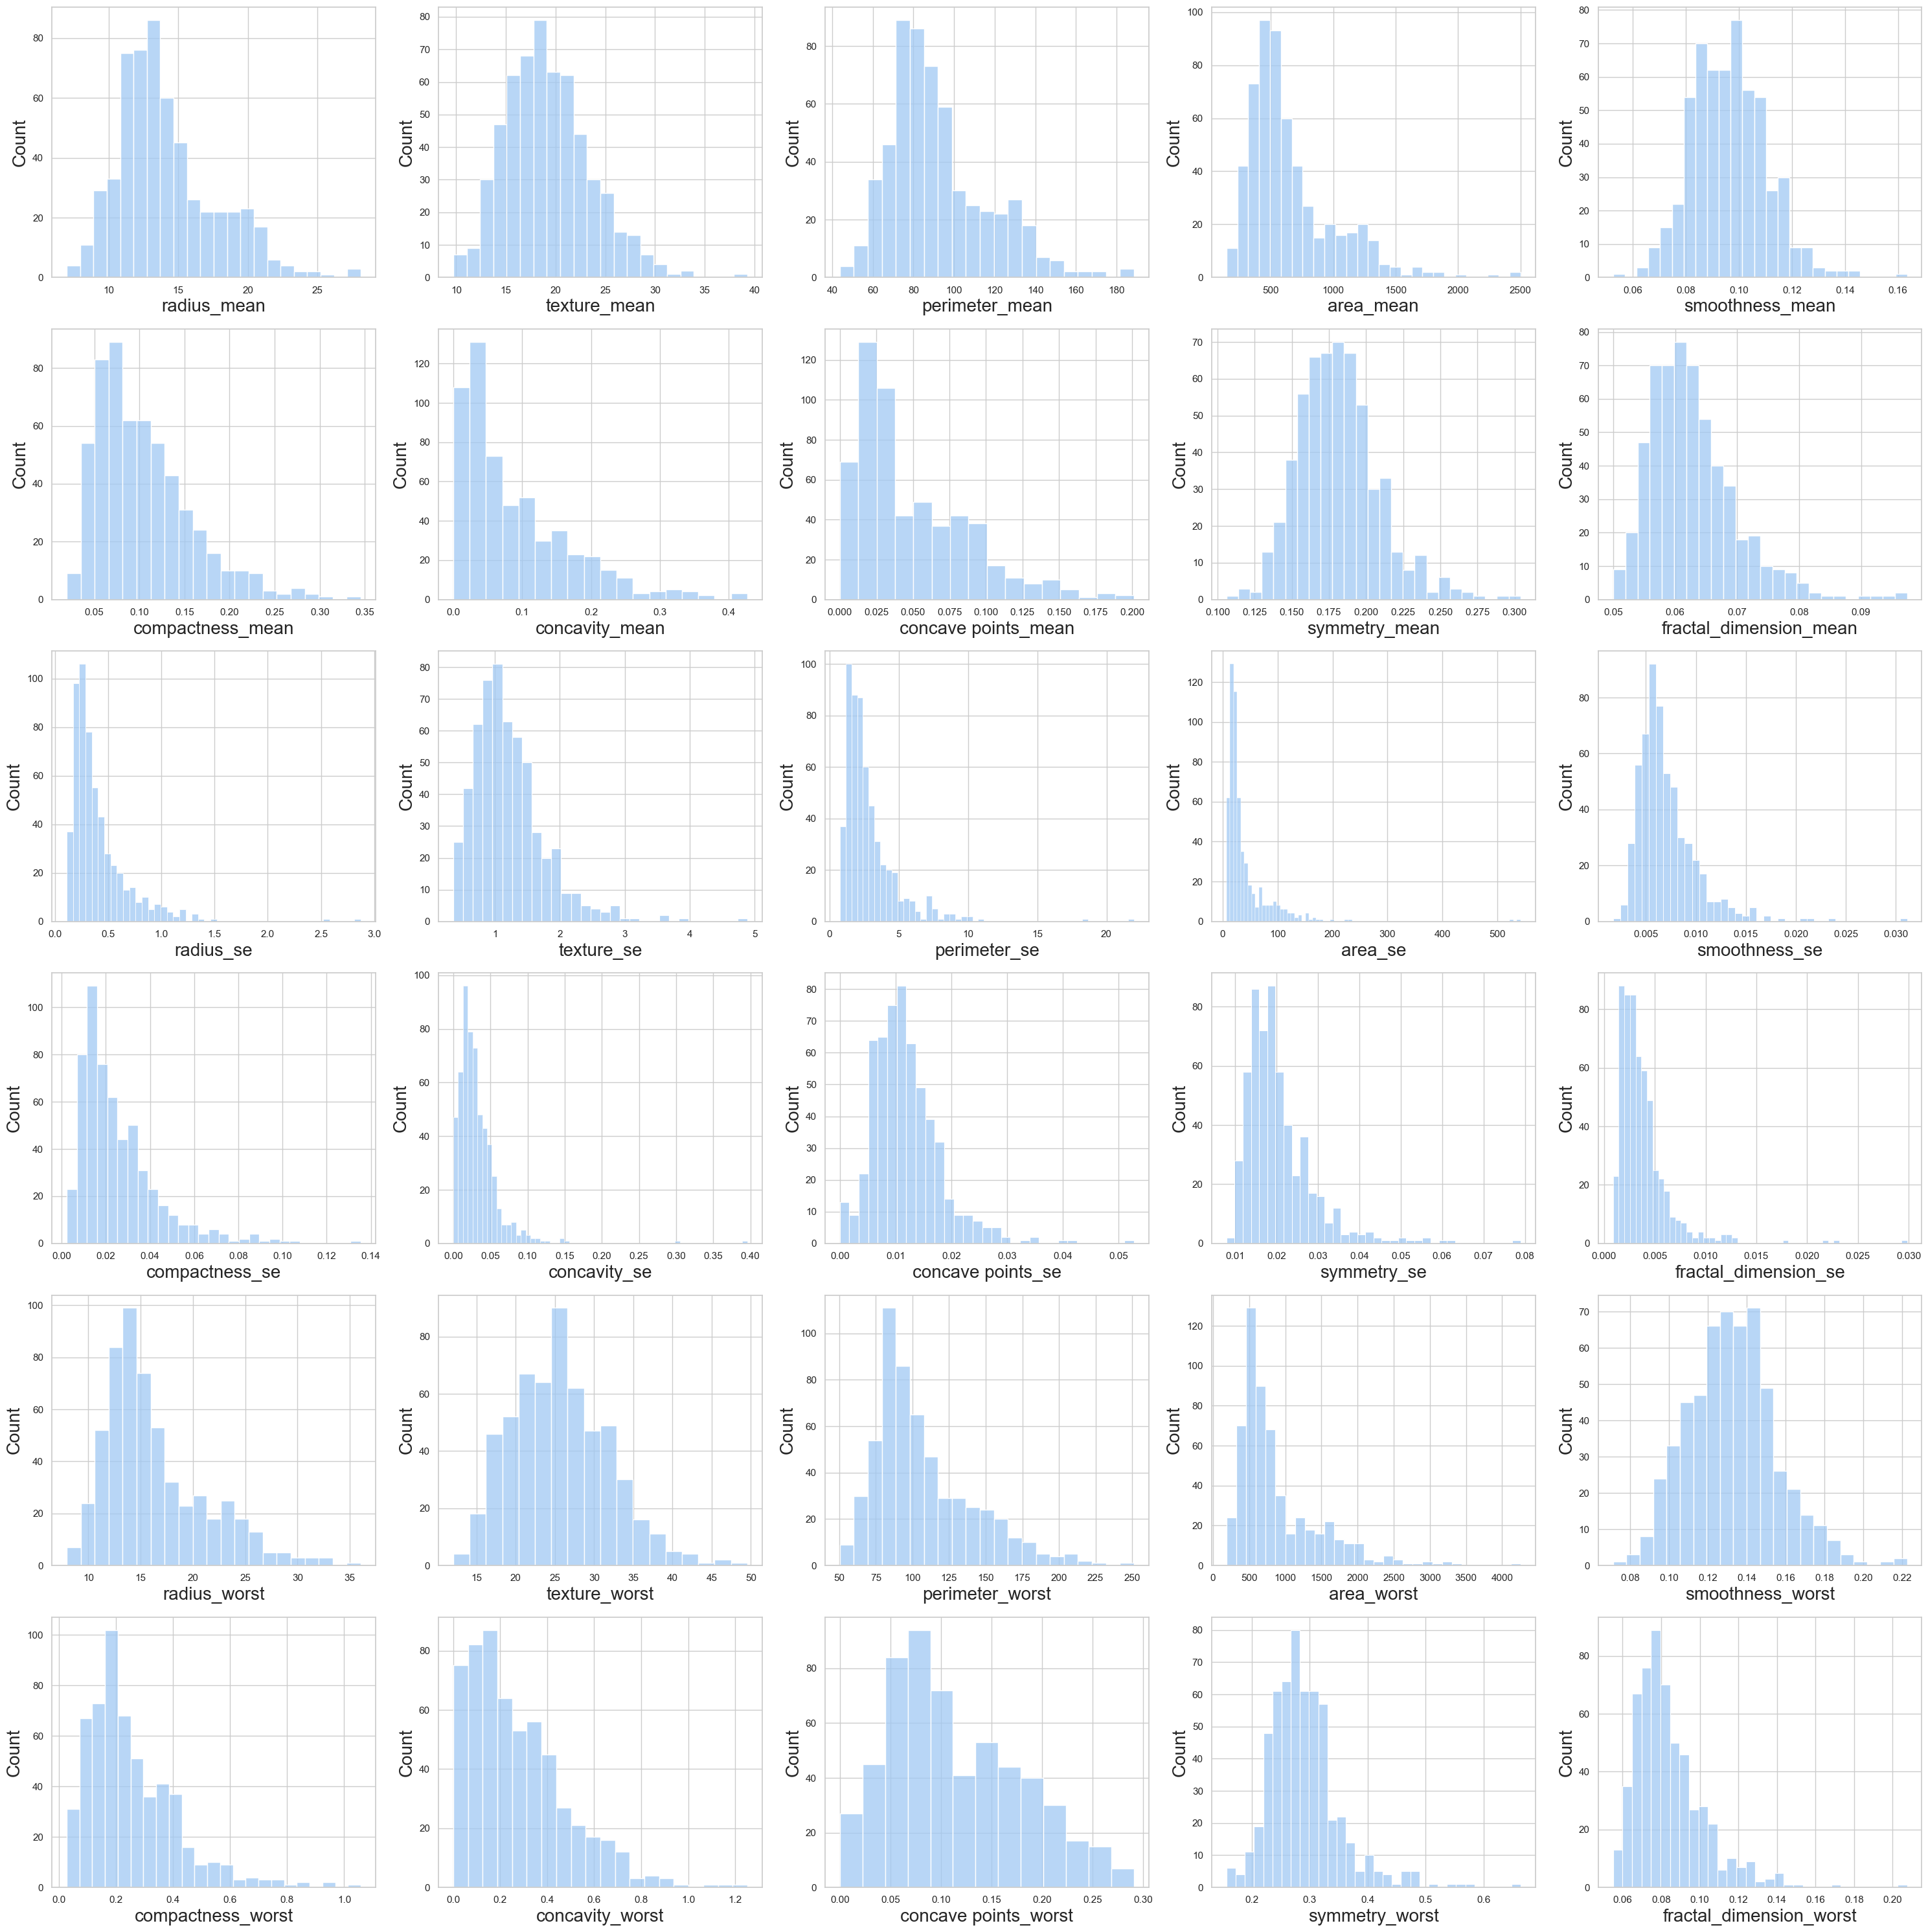

In [181]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(6, 5, figsize=(30, 30))
k = 0
columns = list(df.columns)
columns = columns[1:]
for i in range(6):
    for j in range(5):
        # plot histogram or density plot depending on column data type
        if df[columns[k]].dtype in ['int64', 'float64']:
            sns.histplot(df[columns[k]], ax=ax1[i][j], color=color[0])
        else:
            sns.countplot(df[columns[k]], ax=ax1[i][j], color=color[1])
        # add axis labels
        ax1[i][j].set_xlabel(columns[k], size=20)
        ax1[i][j].set_ylabel('Count', size=20)
        k += 1

# adjust spacing and display plot
fig.tight_layout()
plt.show()

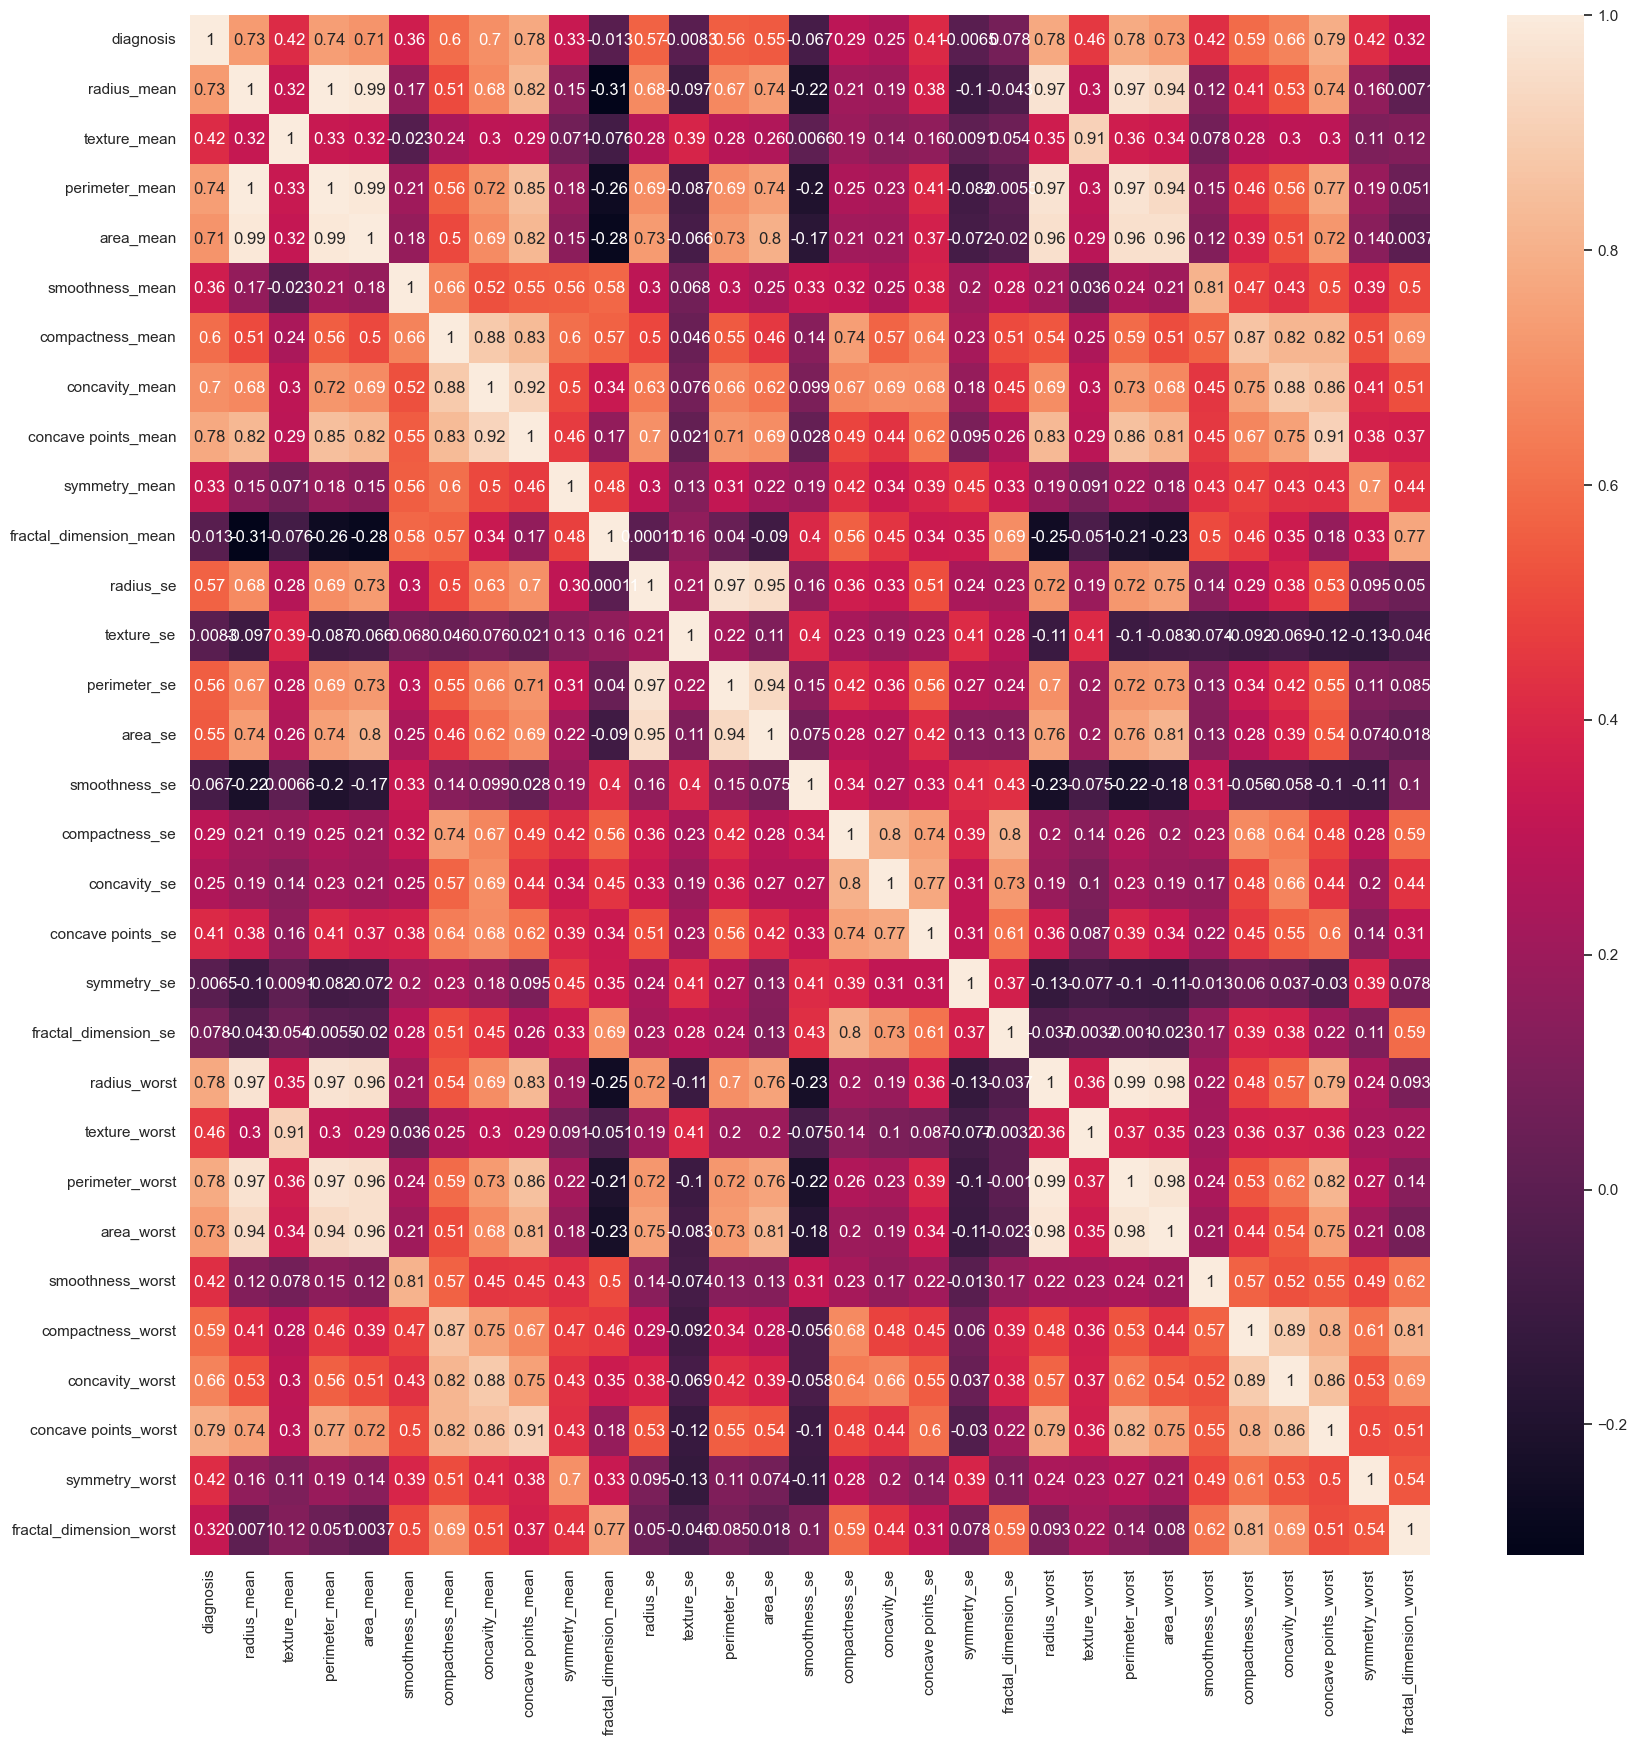

In [182]:
#Heatmap of correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [183]:
#Checking for multicollinearity
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute correlation value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [184]:
correlated_features = correlation(df[features[1:]], 0.9)
print(correlated_features)

{'area_worst', 'perimeter_worst', 'radius_worst', 'area_se', 'area_mean', 'perimeter_mean', 'texture_worst', 'perimeter_se', 'concave points_mean', 'concave points_worst'}


**Since there are many features that have correlation among each other we will drop them**

In [185]:
to_drop = list(correlated_features)

In [186]:
to_drop

['area_worst',
 'perimeter_worst',
 'radius_worst',
 'area_se',
 'area_mean',
 'perimeter_mean',
 'texture_worst',
 'perimeter_se',
 'concave points_mean',
 'concave points_worst']

In [187]:
df = df.drop(columns=to_drop[:1]) #We will keep one feature that represent all of them

In [188]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [221]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.004239,25.450,26.40,166.10,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.002498,23.690,38.25,155.00,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.003892,18.980,34.12,126.70,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.006185,25.740,39.42,184.60,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,0.002783,9.456,30.37,59.16,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [189]:
features = df.columns

In [190]:
X =  df[features[1:]]
y =  df[features[0]]
corr = X.corrwith(y)
ascend_corr = np.abs(corr).sort_values(ascending=False).iloc[0:len(features)].index
corr[ascend_corr] 

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0

In [191]:
corr_list = corr[ascend_corr].index.tolist()
corr_list

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean',
 'concave points_se',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_worst',
 'compactness_se',
 'concavity_se',
 'fractal_dimension_se',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se']

In [205]:
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
for i in range(1,len(corr_list)):
    temp_x = X[corr_list[:i]]
    model = LogisticRegression(max_iter=100)
    model.fit(temp_x, y)
    y_pred = model.predict(temp_x) 
    r2 = r2_score(y, y_pred) 
    n = len(y)
    p = temp_x.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print("Adjusted R^2 Score for top " + str(i) + " correlated features :", adj_r2)

Adjusted R^2 Score for top 1 correlated features : 0.29958342526388615
Adjusted R^2 Score for top 2 correlated features : 0.6454006364196456
Adjusted R^2 Score for top 3 correlated features : 0.644773026926583
Adjusted R^2 Score for top 4 correlated features : 0.6592860347671787
Adjusted R^2 Score for top 5 correlated features : 0.7041900777872059
Adjusted R^2 Score for top 6 correlated features : 0.7568522876820103
Adjusted R^2 Score for top 7 correlated features : 0.7564188692999818
Adjusted R^2 Score for top 8 correlated features : 0.7483583999637591
Adjusted R^2 Score for top 9 correlated features : 0.7784648135421179
Adjusted R^2 Score for top 10 correlated features : 0.7857206316624168
Adjusted R^2 Score for top 11 correlated features : 0.8006690769529585
Adjusted R^2 Score for top 12 correlated features : 0.7772694798022373
Adjusted R^2 Score for top 13 correlated features : 0.7845623648065378
Adjusted R^2 Score for top 14 correlated features : 0.7687573087950527
Adjusted R^2 Sc

**Hence we will use top 17 highly correlated features**

In [206]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_to_select = 17
X_scaled = scaler.fit_transform(X[corr_list[:feature_to_select]])

In [207]:
X[corr_list[:feature_to_select]].head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst,symmetry_worst
0,0.2654,184.60,0.14710,25.38,122.80,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40,17.33,0.1622,0.4601
1,0.1860,158.80,0.07017,24.99,132.90,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08,23.41,0.1238,0.2750
2,0.2430,152.50,0.12790,23.57,130.00,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03,25.53,0.1444,0.3613
3,0.2575,98.87,0.10520,14.91,77.58,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23,26.50,0.2098,0.6638
4,0.1625,152.20,0.10430,22.54,135.10,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44,16.67,0.1374,0.2364


In [208]:
X_scaled

array([[ 2.29607613,  2.30360062,  2.53247522, ..., -1.35929347,
         1.30768627,  2.75062224],
       [ 1.0870843 ,  1.53512599,  0.54814416, ..., -0.36920322,
        -0.37561196, -0.24388967],
       [ 1.95500035,  1.34747521,  2.03723076, ..., -0.02397438,
         0.52740741,  1.152255  ],
       ...,
       [ 0.41406869,  0.57900058,  0.10577736, ...,  1.37485378,
        -0.80958728, -1.10454895],
       [ 2.28998549,  2.30360062,  2.65886573, ...,  2.23792588,
         1.43042677,  1.91908301],
       [-1.74506282, -1.43273495, -1.26181958, ...,  0.76418957,
        -1.85901852, -0.04813821]])

In [209]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,stratify = y, random_state = 0)
train_features = X_train
test_features = X_test


In [210]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def fit_eval_model(model, train_features, y_train, test_features, y_test):
    model.fit(train_features, y_train) 
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features) 
    f1score = f1_score(y_test, test_predicted)
    cm = confusion_matrix(y_test, test_predicted)
    return f1score, cm
  

In [211]:
sv = SVC(random_state=1)
log_reg = LogisticRegression(random_state=1)
rf = RandomForestClassifier(random_state=1)
ab = AdaBoostClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)

SVC F1 score: 0.9397590361445782
LogisticRegression F1 score: 0.9411764705882352
RandomForestClassifier F1 score: 0.9318181818181818
AdaBoostClassifier F1 score: 0.975609756097561
GradientBoostingClassifier F1 score: 0.963855421686747


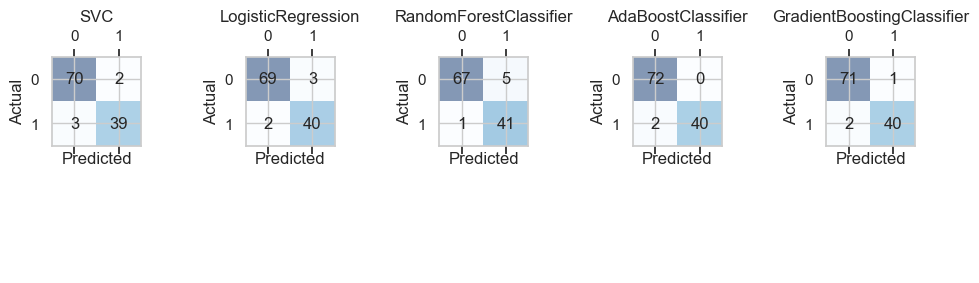

In [212]:
models = [sv, log_reg, rf, ab, gb]
fig, axs = plt.subplots(nrows=2, ncols=len(models), figsize=(10, 3))
for i, model in enumerate(models):
    f1score, cm = fit_eval_model(model, train_features, y_train, test_features, y_test)
    print(model.__class__.__name__, "F1 score:", f1score)
    ax1 = axs[0, i]
    ax1.set_title(model.__class__.__name__)
    ax1.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            ax1.text(k, j, str(cm[j, k]), va='center', ha='center')
    ax2 = axs[1, i]
    ax2.axis('off')
plt.tight_layout()
plt.show()

**Hence We will choose Ada Boost Classifier due to highest f1 score**

In [213]:
def learning_curve(model, X_train, y_train, X_test, y_test):
    """
    A function to plot the learning curve.
    
    Paramters:
    ---------
    model: object
           An object instantiated with AdaBoost classifier
    X_train: array like
             Training features
    y_train: array like
             Training labels
    X_test: array like
            Validation features
    y_test: array like
            Validation labels
            
    Returns:
    --------
    None
    
            
    """
    model.fit(X_train, y_train)
    print("F1 Score Train: ",f1_score(y_train, model.predict(X_train), average = 'weighted'))
    print("F1 Score Test: ",f1_score(y_test, model.predict(X_test), average = 'weighted'))
    train_errors = []
    test_errors = []
    for n_estimators in range(1, 100, 10):
        model.set_params(n_estimators=n_estimators)
        model.fit(X_train, y_train)
        train_errors.append(1 - f1_score(y_train, model.predict(X_train), average = 'weighted'))
        test_errors.append(1 - f1_score(y_test, model.predict(X_test), average = 'weighted'))
    plt.figure(figsize = (8,8))
    plt.plot(range(1, 100, 10), train_errors, label = 'Training')
    plt.plot(range(1, 100, 10), test_errors, label = 'Validation')
    plt.legend()
    plt.xlabel("Number of trees")
    plt.ylabel("Error")
    plt.title("Learning Curve")
    plt.show()

F1 Score Train:  0.9779390395034108
F1 Score Test:  0.9476097712345062


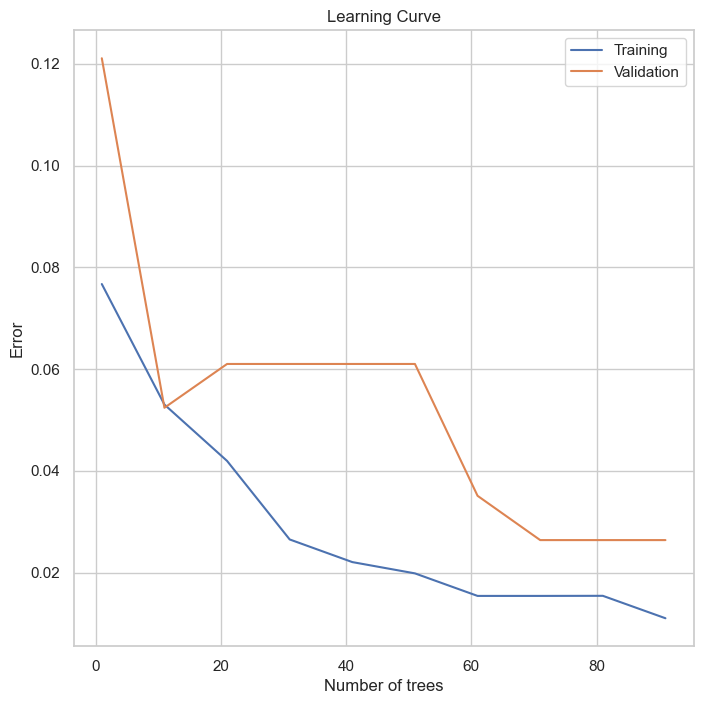

In [214]:
model_ab = AdaBoostClassifier(n_estimators = 50 ,learning_rate = 0.1, random_state = 1)
learning_curve(model_ab, X_train, y_train, X_test, y_test)

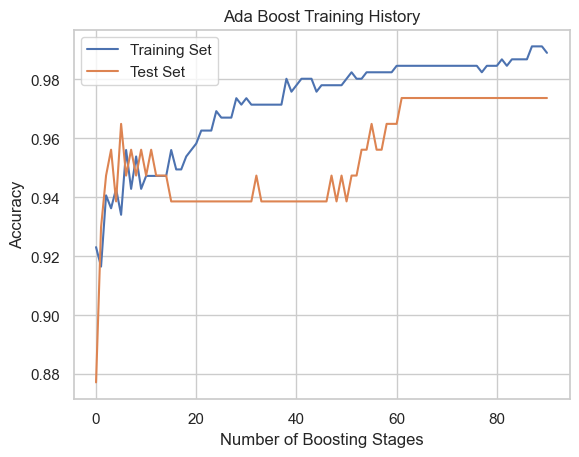

In [215]:
train_acc = []
test_acc = []
for y_pred in model_ab.staged_predict(X_train):
    train_acc.append(np.mean(y_pred == y_train))
for y_pred in model_ab.staged_predict(X_test):
    test_acc.append(np.mean(y_pred == y_test))

# Plot the training history
plt.plot(train_acc, label='Training Set')
plt.plot(test_acc, label='Test Set')
plt.xlabel('Number of Boosting Stages')
plt.ylabel('Accuracy')
plt.title('Ada Boost Training History')
plt.legend()
plt.show()

In [216]:
# with open('ab_model.pkl', 'wb') as file:
#     pickle.dump(model_ab, file)
    
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

In [239]:
with open('ab_model.pkl', 'rb') as file:
    ab_loaded = pickle.load(file)
with open('scaler.pkl', 'rb') as file:
    scaler_loaded = pickle.load(file)

In [250]:
# # Prompt the user to input data for each feature
# concave_points_worst = float(input("Enter concave points_worst: "))
# perimeter_worst = float(input("Enter perimeter_worst: "))
# concave_points_mean = float(input("Enter concave points_mean: "))
# radius_worst = float(input("Enter radius_worst: "))
# perimeter_mean = float(input("Enter perimeter_mean: "))
# radius_mean = float(input("Enter radius_mean: "))
# area_mean = float(input("Enter area_mean: "))
# concavity_mean = float(input("Enter concavity_mean: "))
# concavity_worst = float(input("Enter concavity_worst: "))
# compactness_mean = float(input("Enter compactness_mean: "))
# compactness_worst = float(input("Enter compactness_worst: "))
# radius_se = float(input("Enter radius_se: "))
# perimeter_se = float(input("Enter perimeter_se: "))
# area_se = float(input("Enter area_se: "))
# texture_worst = float(input("Enter texture_worst: "))
# smoothness_worst = float(input("Enter smoothness_worst: "))
# symmetry_worst = float(input("Enter symmetry_worst: "))

# # Create a new DataFrame with the input data

# input_data = pd.DataFrame({'concave_points_worst': concave_points_worst,'perimeter_worst': perimeter_worst,'concave_points_mean': concave_points_mean,
# 'radius_worst': radius_worst,'perimeter_mean': perimeter_mean,'radius_mean': radius_mean,
# 'area_mean': area_mean,'concavity_mean': concavity_mean,'concavity_worst': concavity_worst,
# 'compactness_mean': compactness_mean,'compactness_worst': compactness_worst,'radius_se': radius_se,
# 'perimeter_se': perimeter_se,'area_se': area_se,'texture_worst': texture_worst,'smoothness_worst': smoothness_worst,'symmetry_worst': symmetry_worst}, index=[0])

# input_scaled = scaler_loaded.transform(input_data)
# # Use the trained model to predict the breast cancer for the input data
# prediction = ab_loaded.predict(input_scaled)

# if prediction[0] == 0:
#     print("The model predicts no presence of breast cancer.")
# else:
#     print("The model predicts presence of cancer.")

In [249]:
sample_data = df[corr_list[:feature_to_select]]
last_row = [sample_data.iloc[-1]]
sample_scaled = scaler_loaded.transform(last_row)
prediction = ab_loaded.predict(sample_scaled)
if prediction[0] == 0:
    print("The model predicts no presence of breast cancer.")
else:
    print("The model predicts presence of cancer.")

The model predicts no presence of breast cancer.


In [15]:

temp = ['concave points_worst','perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst','diagnosis']

sample_data = df[temp]
last_row = [sample_data.iloc[-1]]

In [16]:
print(last_row)

[concave points_worst        0.0
perimeter_worst           59.16
concave points_mean         0.0
radius_worst              9.456
perimeter_mean            47.92
radius_mean                7.76
area_mean                 181.0
concavity_mean              0.0
concavity_worst             0.0
compactness_mean        0.04362
compactness_worst       0.06444
radius_se                0.3857
perimeter_se              2.548
area_se                   19.15
texture_worst             30.37
smoothness_worst        0.08996
symmetry_worst           0.2871
diagnosis                     B
Name: 568, dtype: object]
